# Дипломный проект  

# 1. Загрузить файл hr.csv.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [2]:
hr = pd.read_csv('HR.csv')

* satisfaction_level (уровень удовлетворенности)    
* last_evaluation (последняя оценка)
* number_project (номер проекта)
* average_monthly_hours (средние часы в месяц)
* time_spend_company (стаж в компании -лет)
* Work_accident (несчастный случай на работе)
* left (уволен)
* promotion_last_5years (повышения за последние 5 лет)
* sales (отдел)
* salary (зарплата)

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
175,0.54,0.74,4,164,2,0,1,0,sales,low
2797,0.57,0.72,3,202,3,1,0,0,support,medium
14411,0.90,0.82,5,259,5,0,1,0,support,low
10518,0.24,0.95,3,168,4,0,0,0,IT,medium
6920,0.93,0.96,4,223,3,1,0,0,support,high
3333,0.68,0.85,4,156,2,0,0,0,support,low
2254,0.91,0.82,3,183,3,0,0,0,technical,medium
5264,0.93,0.77,5,224,2,0,0,0,marketing,low
12321,0.82,0.84,5,244,5,0,1,0,sales,low
11726,0.57,0.82,5,233,7,0,0,1,sales,medium


In [6]:
len(hr.index)

14999

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

В наших данных нет пропущенных значений:

In [9]:
 hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [10]:
import statistics

In [11]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


mean - среднее;
min - минимальное;
max - максимальное;
std - среднее отклонение;
50% - медиана.

In [12]:
 hr.shape

(14999, 10)

In [13]:
 hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = hr.select_dtypes(include=numerics)

In [16]:
newdf.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
4657,0.95,0.76,3,236,2,1,0,0
10394,0.70,0.58,4,207,2,1,0,0
14818,0.11,0.88,5,250,4,0,1,0
6141,0.85,0.60,5,178,2,0,0,0
8158,0.99,0.82,3,255,2,0,0,0


In [17]:
headers = list(newdf.columns.values)

In [18]:
#Подсчёт моды
def mode(header):
    try:
        print('Значение моды: ', statistics.mode(newdf[header]))
    except:
        print('Метод statistics не сработал!')

In [35]:
for header in headers:
    print (header)
    #aim = str(header)
    print('Медиана: ', statistics.median(newdf[header]))
    #print('Значение моды: ', statistics.mode(newdf[header]))
    mode(header)
    print('------------------------------')

satisfaction_level
Медиана:  0.64
Значение моды:  0.1
------------------------------
last_evaluation
Медиана:  0.72
Значение моды:  0.55
------------------------------
number_project
Медиана:  4
Значение моды:  4
------------------------------
average_montly_hours
Медиана:  200
Метод statistics не сработал!
------------------------------
time_spend_company
Медиана:  3
Значение моды:  3
------------------------------
Work_accident
Медиана:  0
Значение моды:  0
------------------------------
left
Медиана:  0
Значение моды:  0
------------------------------
promotion_last_5years
Медиана:  0
Значение моды:  0
------------------------------


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

**Расчёт:**

In [19]:
corr_m = hr.corr().round(2)
corr_m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


**Визуализация:**

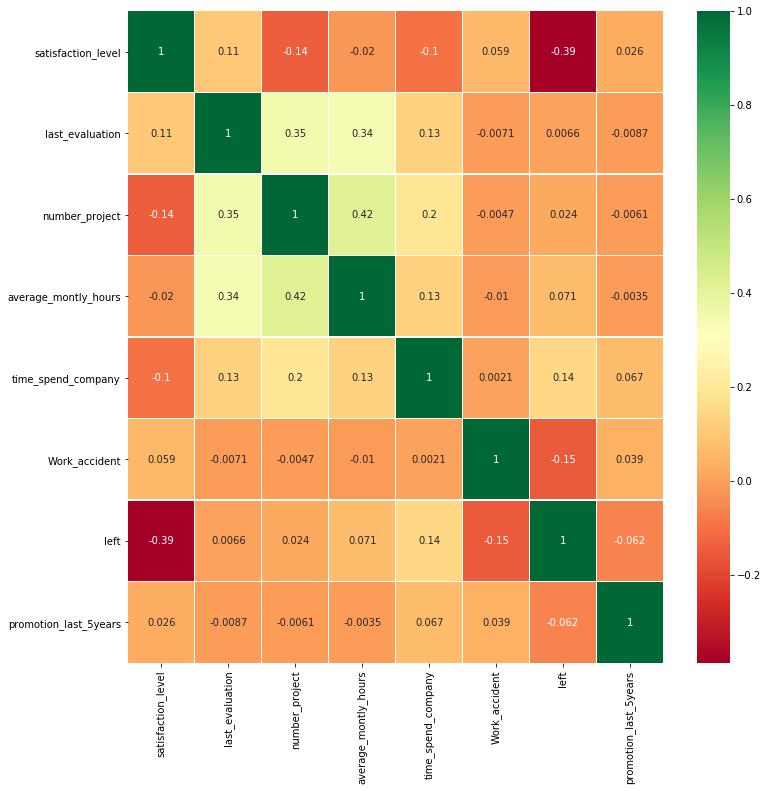

In [20]:
import seaborn as sns
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

# 4. Визуализировать несколько взаимосвязей между переменными.

In [21]:
hr.groupby('sales').mean() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [22]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [23]:
hr.groupby('salary').mean().reset_index()

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
1,low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
2,medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


# Визуализируем данные

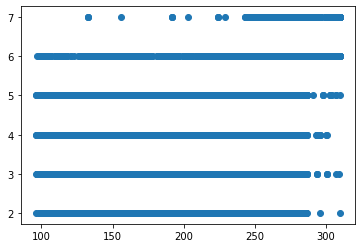

In [24]:
plt.scatter(hr.average_montly_hours, hr.number_project)
plt.show()

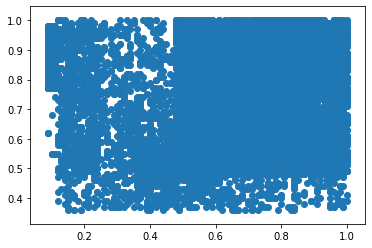

In [25]:
plt.scatter(hr.satisfaction_level, hr.last_evaluation)
plt.show()

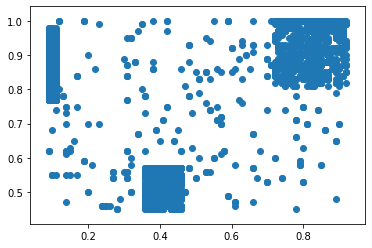

In [26]:
plt.scatter(hr[hr.left==1].satisfaction_level, hr[hr.left==1].last_evaluation)
plt.show()

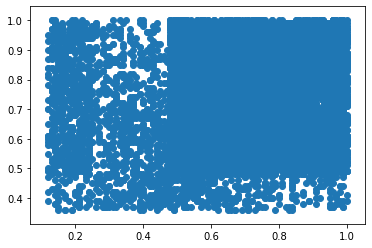

In [27]:
plt.scatter(hr[hr.left==0].satisfaction_level, hr[hr.left==0].last_evaluation)
plt.show()

In [ ]:
fig = sns.pairplot(data=hr, hue='left')
plt.show()

In [ ]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(hr, kind="reg", hue="left")
plt.show()

In [ ]:
fig = sns.pairplot(data=hr, hue='salary')
plt.show()

In [ ]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(hr, kind="reg", hue="salary")
plt.show()

График 'текучки' персонала по отделам

Text(0, 0.5, 'Частота текучести кадров')

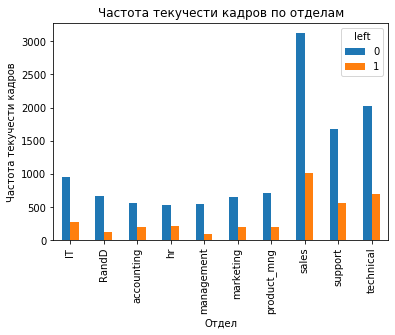

In [32]:
%matplotlib inline 
import matplotlib.pyplot as plt 
pd.crosstab(hr.sales,hr.left).plot(kind='bar') 
plt.title('Частота текучести кадров по отделам') 
plt.xlabel('Отдел') 
plt.ylabel('Частота текучести кадров') 
#plt.savefig('sales_bar_chart')

Text(0, 0.5, 'Доля работников')

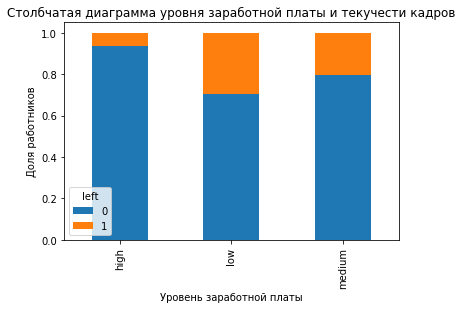

In [33]:
table=pd.crosstab(hr.salary, hr.left) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Столбчатая диаграмма уровня заработной платы и текучести кадров') 
plt.xlabel('Уровень заработной платы') 
plt.ylabel('Доля работников') 
#plt.savefig('salary_bar_chart') 

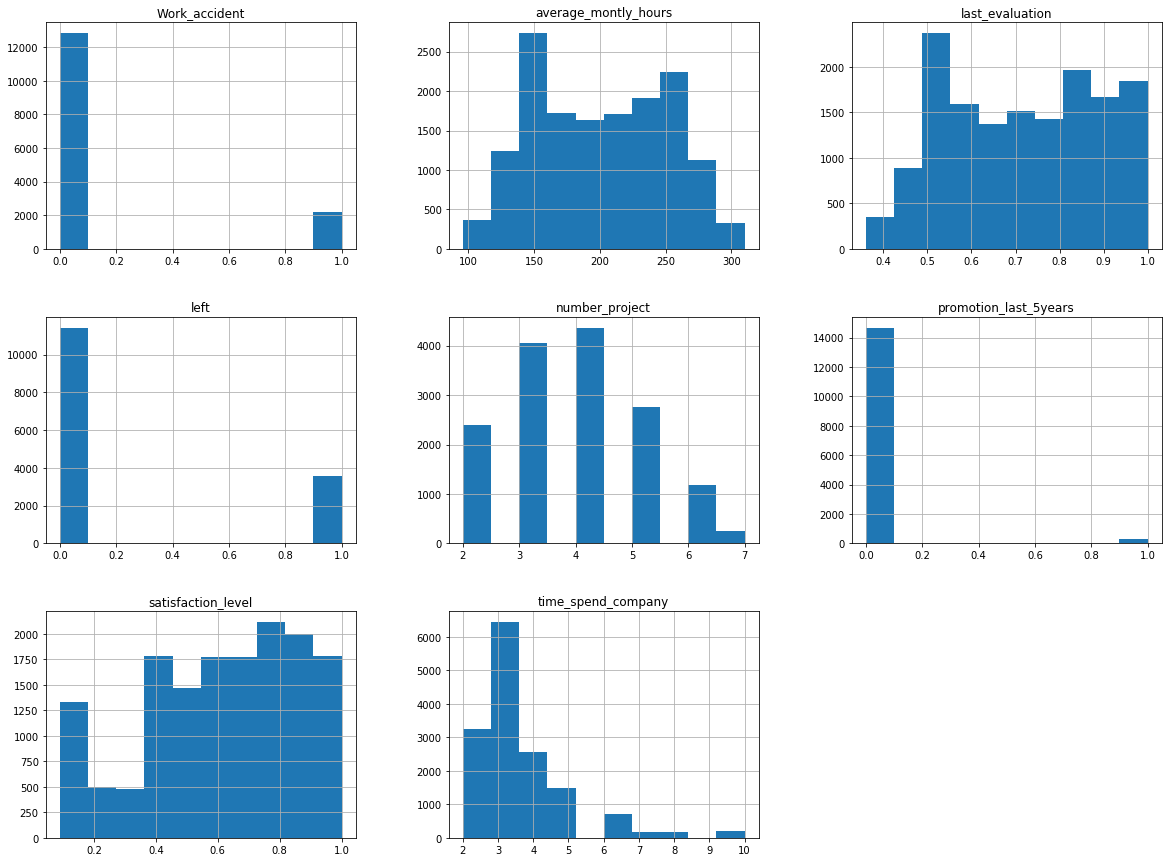

In [34]:
num_bins = 10 

hr.hist(bins=num_bins, figsize=(20,15)) 
plt.savefig("hr_histogram_plots") 
plt.show()

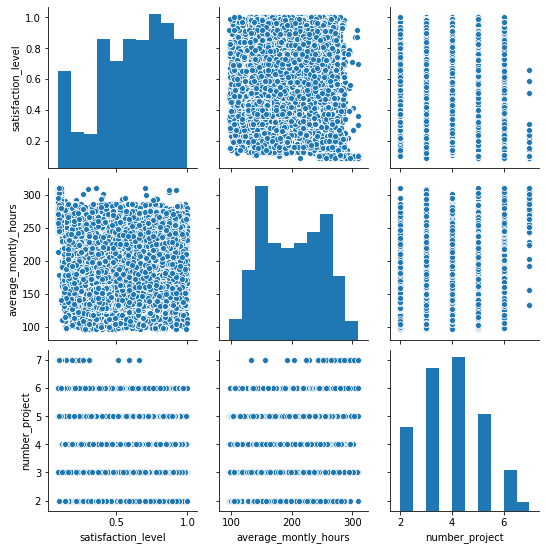

In [35]:
sns_plot = sns.pairplot(
    hr[['satisfaction_level', 'average_montly_hours', 'number_project']])
sns_plot

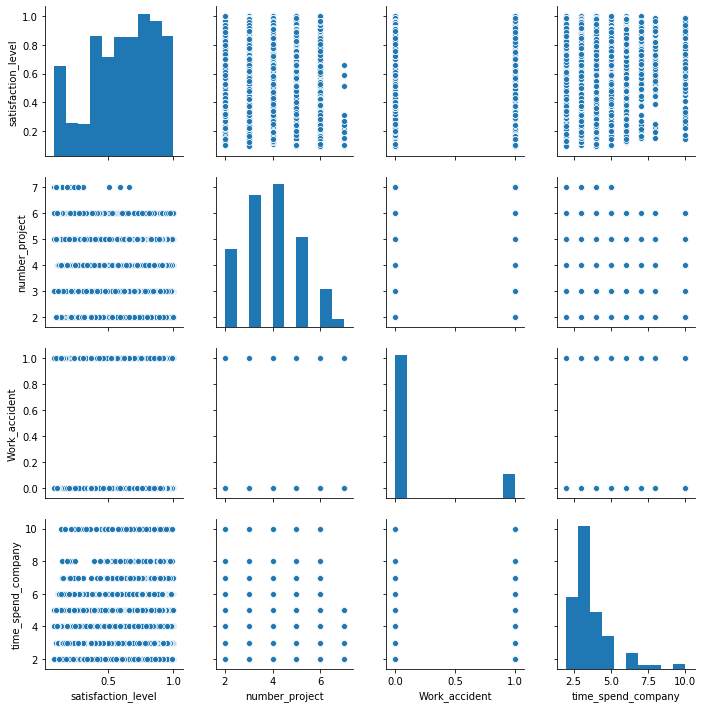

In [35]:
sns_plot = sns.pairplot(
    hr[['satisfaction_level', 'number_project', 'Work_accident', 'time_spend_company']])
sns_plot

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Среднее количество часов в месяц, количество выполненных проектов.

In [37]:
stats.ttest_ind(hr.average_montly_hours, hr.number_project)

Ttest_indResult(statistic=483.54229603425085, pvalue=0.0)

p-value < 0.05, это значит, что имеется статистическое различие между атрибутами.

Уровень удовлетворённости, количество выполненных проектов.

In [39]:
stats.ttest_ind(hr.satisfaction_level, hr.number_project)

Ttest_indResult(statistic=-310.721972689063, pvalue=0.0)

p-value < 0.05, это значит, что имеется статистическое различие между атрибутами.

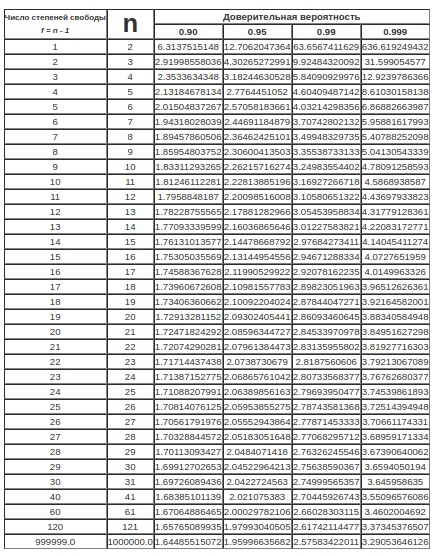

In [41]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=800)

# 6. Рассчитать сколько работников работает в каждом департаменте.

Где работали уволившиеся сотрудники

In [43]:
hr[hr['left']==1]['sales'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

Текущие сотрудники кампании:

In [44]:
hr[hr['left']==0]['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

 Суммарно по двум категориям:

In [46]:
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

# 7. Показать распределение сотрудников по зарплатам.

Среди уволенных:

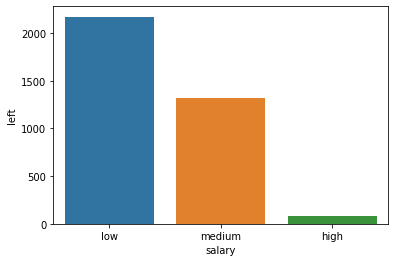

In [47]:
hr1 = hr[hr['left']==1]
sns.barplot(x='salary', y='left', data=hr1, estimator=len)

Среди оставшихся работать:

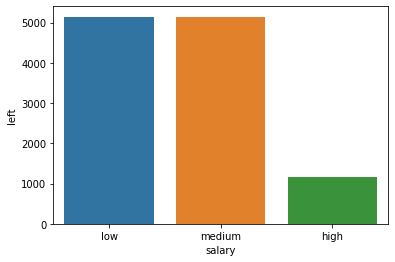

In [48]:
hr0 = hr[hr['left']==0]
sns.barplot(x='salary', y='left', data=hr0, estimator=len)

Суммарно по всем сотрудникам (уволились или работают):

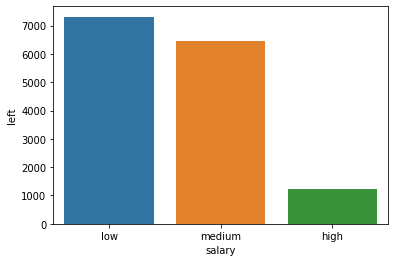

In [49]:
sns.barplot(x='salary', y='left', data=hr, estimator=len)

Text(0, 0.5, 'Доля работников')

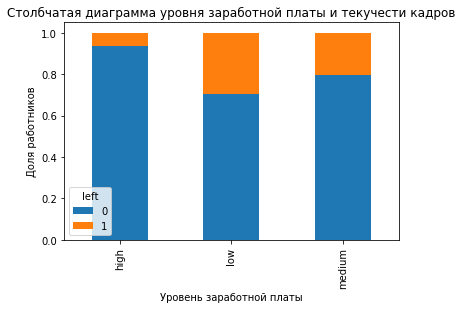

In [50]:
table=pd.crosstab(hr.salary, hr.left) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Столбчатая диаграмма уровня заработной платы и текучести кадров') 
plt.xlabel('Уровень заработной платы') 
plt.ylabel('Доля работников') 
#plt.savefig('salary_bar_chart')  

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

Text(0, 0.5, 'Доля работников')

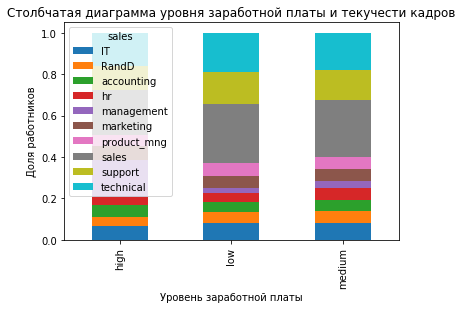

In [51]:
table=pd.crosstab(hr.salary, hr.sales) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Столбчатая диаграмма уровня заработной платы и текучести кадров') 
plt.xlabel('Уровень заработной платы') 
plt.ylabel('Доля работников') 
#plt.savefig('salary_bar_chart') 

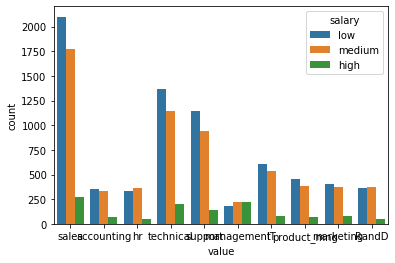

In [52]:
sns.countplot(x="value", hue="salary", data=pd.melt(hr, col_level=0, id_vars=['salary'], value_vars=['sales']))

# 9. Сколько сотрудников покинули компанию.

In [53]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [54]:
hr['left'].value_counts()[1]

3571

**Ушло 3571 сотрудников**, а осталось 11428 сотрудников.